#Predicting Stock Market Index Movements with Macroeconomic Changes

## Introduction to Problem and Data

###Problem Statement:

The relationship between stock market movements and macroeconomic factors is an interesting area of analysis in financial economics. Understanding how key economic indicators such as inflation, unemployment, GDP, and exchange rates impact stock market index prices can help investors and policymakers make more informed decisions. Through this project, I aim to develop a predictive model that estimates the future stock index prices of various countries based on the movement of macroeconomic factors from 1980 to 2020. By analyzing data from nine different countries (United States, China, France, Germany, Hong Kong, India, Japan, Spain, and the United Kingdom), the project seeks to uncover significant patterns and correlations between economic variables and stock price movements.

The predictive model developed in this project can help us deve deeer into into how stock market indices react to changes in macroeconomic factors, aiding investors in their decision-making processes and improving their understanding of global economic dynamics.

### Dataset Description:

The dataset used for this analysis includes macroeconomic data and stock index prices for nine countries from 1980 to 2020. The features in the dataset include:

Stock Index: The major stock index for each country (e.g., NASDAQ, FTSE 100, DAX).

Country: The country of the stock market index.

Year: The year of the data point.

Index Price: The closing price of the stock index.

Log Index Price: The natural logarithm of the stock index price.

Inflation Rate: Annual inflation rate for the country.

Oil Prices: The price of oil, impacting global economies.

Exchange Rate: The exchange rate relative to the US dollar.

GDP Percent: The percentage change in GDP.

Per Capita Income: Annual per capita income.

Unemployment Rate: The national unemployment rate.

Manufacturing Output: Output of the manufacturing sector.

Trade Balance: The difference between exports and imports.

USTreasury: US Treasury yields.



As a whole, I chose this dataset because it provides valuable economic variables that can be used to predict the movement of stock indices across different countries.

## Data Pre-Processing and Preliminary Examination

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [2]:
df = pd.read_csv('economic_data.csv')
df.head()

,stock index,country,year,index price,log_indexprice,inflationrate,oil prices,exchange_rate,gdppercent,percapitaincome,unemploymentrate,manufacturingoutput,tradebalance,USTreasury
0,NASDAQ,United States of America,1980.0,168.61,2.23,0.14,21.59,1.0,0.09,12575.0,0.07,NaN,-13.06,0.11
1,NASDAQ,United States of America,1981.0,203.15,2.31,0.10,31.77,1.0,0.12,13976.0,0.08,NaN,-12.52,0.14
2,NASDAQ,United States of America,1982.0,188.98,2.28,0.06,28.52,1.0,0.04,14434.0,0.10,NaN,-19.97,0.13
3,NASDAQ,United States of America,1983.0,285.43,2.46,0.03,26.19,1.0,0.09,15544.0,0.10,NaN,-51.64,0.11
4,NASDAQ,United States of America,1984.0,248.89,2.40,0.04,25.88,1.0,0.11,17121.0,0.08,NaN,-102.73,0.12


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   stock index          369 non-null    object 
 1   country              369 non-null    object 
 2   year                 369 non-null    float64
 3   index price          317 non-null    float64
 4   log_indexprice       369 non-null    float64
 5   inflationrate        326 non-null    float64
 6   oil prices           369 non-null    float64
 7   exchange_rate        367 non-null    float64
 8   gdppercent           350 non-null    float64
 9   percapitaincome      368 non-null    float64
 10  unemploymentrate     348 non-null    float64
 11  manufacturingoutput  278 non-null    float64
 12  tradebalance         365 non-null    float64
 13  USTreasury           369 non-null    float64
dtypes: float64(12), object(2)
memory usage: 40.5+ KB
None


We can see that there a quite a few missing values for some features, so we can observe the dataset further to understand what to do about these values.

In [4]:
print(df.describe())

              year   index price  log_indexprice  inflationrate  oil prices  \
count   369.000000    317.000000      369.000000     326.000000  369.000000   
mean   2000.000000   7898.648297        3.610542       0.041748   39.743171   
std      11.848225   7811.336862        0.482481       0.039579   25.452654   
min    1980.000000    168.610000        2.230000      -0.040000   11.350000   
25%    1990.000000   2407.100000        3.320000       0.020000   19.410000   
50%    2000.000000   5160.100000        3.600000       0.030000   28.520000   
75%    2010.000000  10279.500000        3.980000       0.057500   57.880000   
max    2020.000000  47751.330000        4.680000       0.240000   98.560000   

       exchange_rate  gdppercent  percapitaincome  unemploymentrate  \
count     367.000000  350.000000       368.000000        348.000000   
mean       27.897548    0.037114     20719.964674          0.068908   
std        49.620521    0.037850     17435.037783          0.043207   
min 

In [5]:
missing_data = df.isnull().sum()
print("Missing Data:\n", missing_data)

Missing Data:
 stock index             0
country                 0
year                    0
index price            52
log_indexprice          0
inflationrate          43
oil prices              0
exchange_rate           2
gdppercent             19
percapitaincome         1
unemploymentrate       21
manufacturingoutput    91
tradebalance            4
USTreasury              0
dtype: int64


Here, we have the amount of missing data by feature, which is helpful. Index price, inflation rate, manufacturing output, unemployment rate, and gdp percent have a significant number of missing values. Below, we have a heatmap of the missing data, which can help us look at this visually.

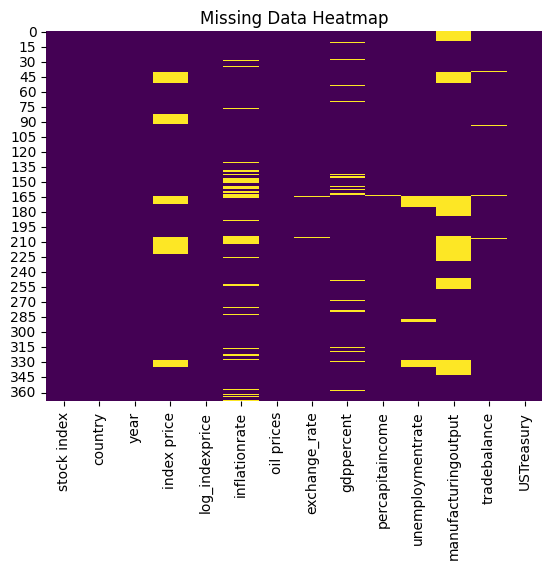

In [6]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

Here, I have filled missing values using forward fill or interpolation, because it preserves the temporal or contextual continuity of the data. Forward fill ensures that missing values are replaced with the most recent valid observation.

In [7]:
df.isnull().sum()
df.fillna(method='ffill', inplace=True)

<ipython-input-7-e56a845b3344>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   stock index          369 non-null    object 
 1   country              369 non-null    object 
 2   year                 369 non-null    float64
 3   index price          369 non-null    float64
 4   log_indexprice       369 non-null    float64
 5   inflationrate        369 non-null    float64
 6   oil prices           369 non-null    float64
 7   exchange_rate        369 non-null    float64
 8   gdppercent           369 non-null    float64
 9   percapitaincome      369 non-null    float64
 10  unemploymentrate     369 non-null    float64
 11  manufacturingoutput  359 non-null    float64
 12  tradebalance         369 non-null    float64
 13  USTreasury           369 non-null    float64
dtypes: float64(12), object(2)
memory usage: 40.5+ KB
None


In [9]:
print(df.describe())

              year   index price  log_indexprice  inflationrate  oil prices  \
count   369.000000    369.000000      369.000000     369.000000  369.000000   
mean   2000.000000   9108.543496        3.610542       0.038184   39.743171   
std      11.848225   8603.543010        0.482481       0.038880   25.452654   
min    1980.000000    168.610000        2.230000      -0.040000   11.350000   
25%    1990.000000   2846.500000        3.320000       0.020000   19.410000   
50%    2000.000000   5978.060000        3.600000       0.030000   28.520000   
75%    2010.000000  12093.560000        3.980000       0.050000   57.880000   
max    2020.000000  47751.330000        4.680000       0.240000   98.560000   

       exchange_rate  gdppercent  percapitaincome  unemploymentrate  \
count     369.000000  369.000000       369.000000        369.000000   
mean       28.056694    0.036098     20772.520325          0.067886   
std        49.666804    0.037365     17440.576883          0.042514   
min 

Now that the missing values are dealt with, we can proceed with the exploratory data analysis.

## Exploratory Data Analysis

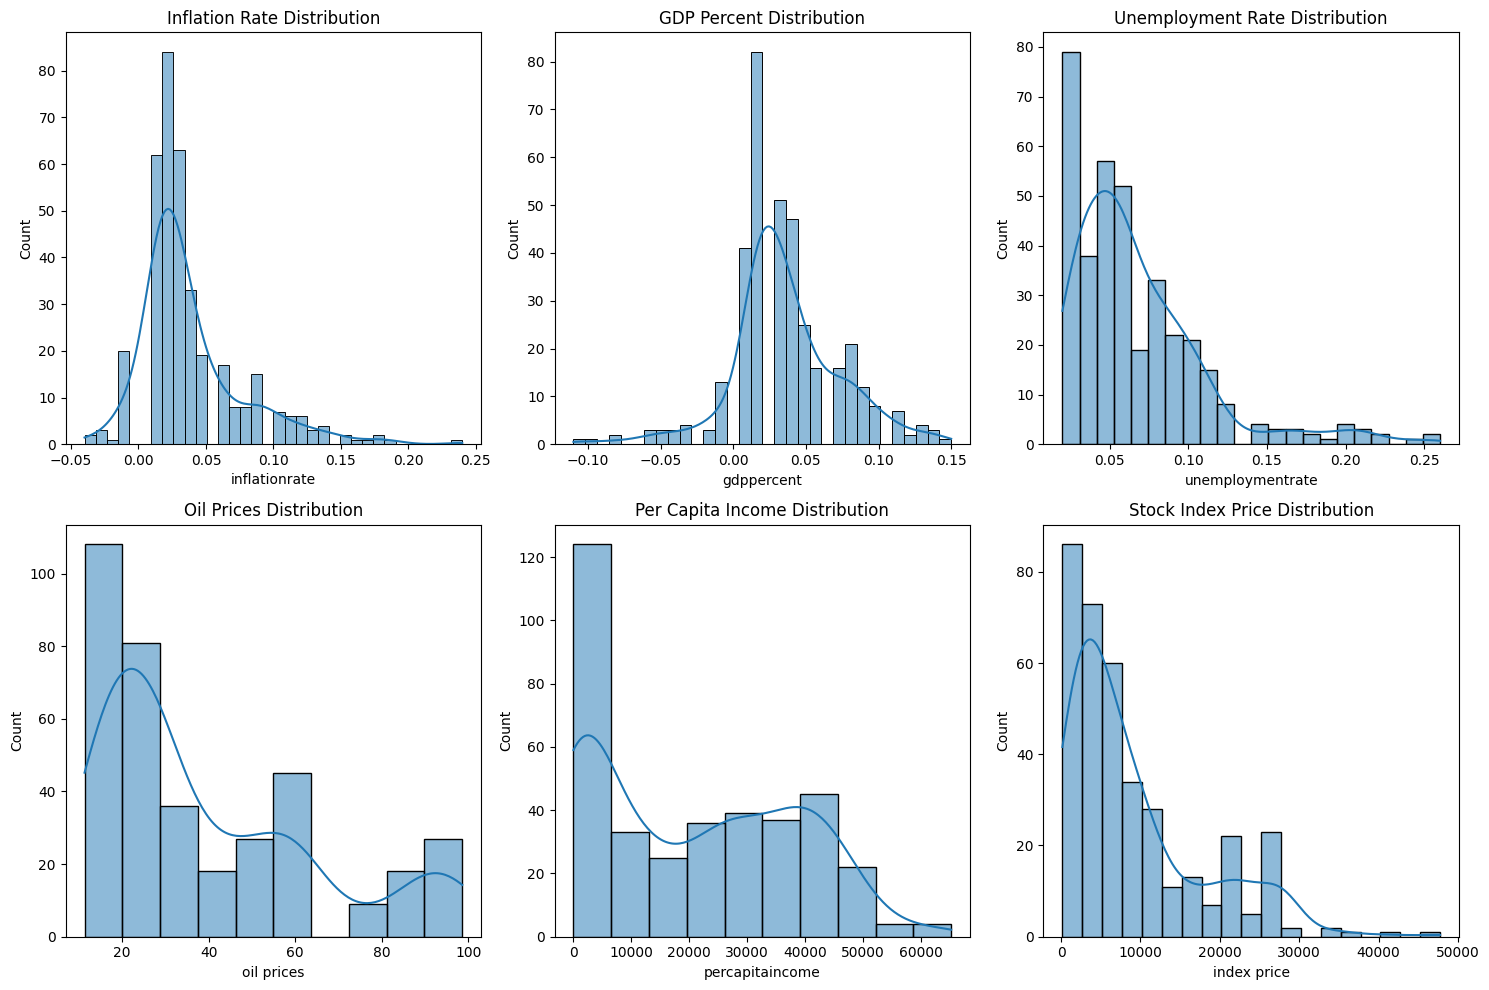

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.histplot(df['inflationrate'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Inflation Rate Distribution')

sns.histplot(df['gdppercent'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('GDP Percent Distribution')

sns.histplot(df['unemploymentrate'], kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Unemployment Rate Distribution')

sns.histplot(df['oil prices'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Oil Prices Distribution')

sns.histplot(df['percapitaincome'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Per Capita Income Distribution')

sns.histplot(df['index price'], kde=True, ax=axes[1, 2])
axes[1, 2].set_title('Stock Index Price Distribution')

plt.tight_layout()
plt.show()

As a first step, we check the distributions of key features in the dataset.

Inlfation rates seem to have a large proportion of observations about the 0-5% range, with some interesting outliers indication deflationary environments and others on the opposite end of the spectrum with rates above 10%.

GDP distributions also seem to show a similar majority trend, around the 0-5% range, but with the outliers spread move evelny on both sides.

Unemployment rates seem to have the highest distribution below 5%.

Oil prices have the highest number of observations about the 20-40 range, with a few observations going as high as 80-100.

Per-capita income appears to have the highest porportion of observations in the 0-50000 range, with observations from 100000 to 500000 spread more evenly.

Finally, stock index prices seem to have the highest proportion about the 0-10000 range.



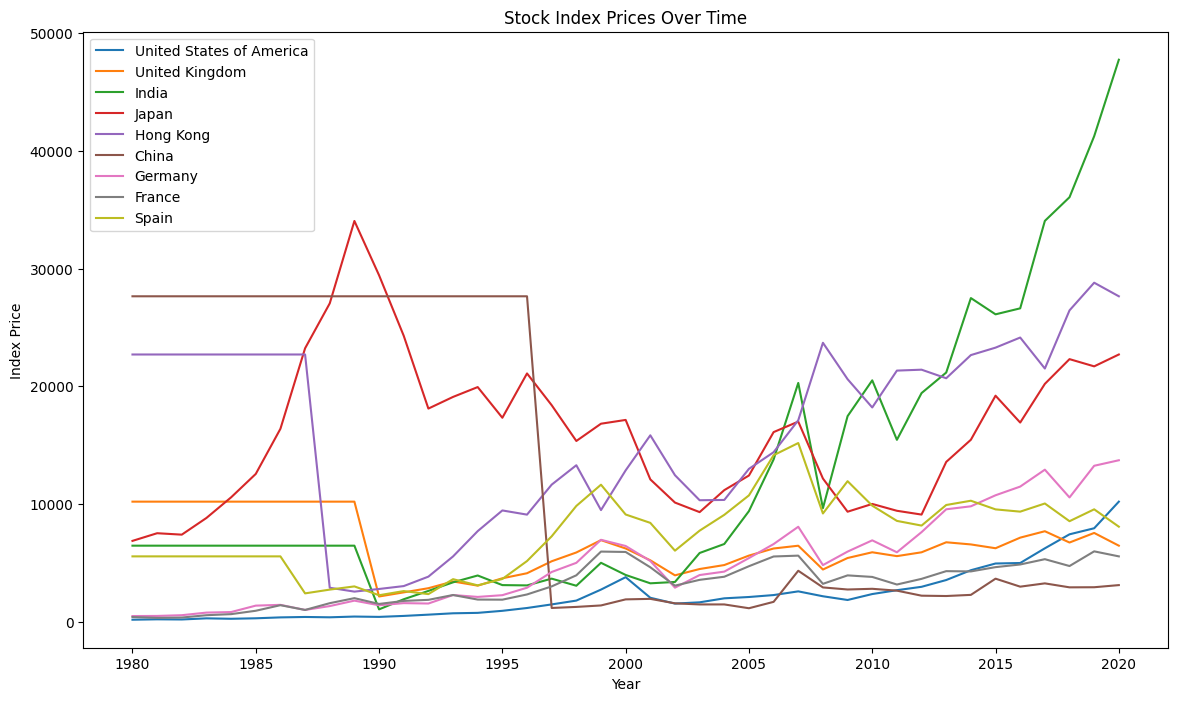

In [11]:
plt.figure(figsize=(14, 8))
for country in df['country'].unique():
    country_data = df[df['country'] == country]
    plt.plot(country_data['year'], country_data['index price'], label=country)

plt.title('Stock Index Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Index Price')
plt.legend(loc='upper left')
plt.show()

Taking a look at stock index prices more deeply, we see an upwardtrend in indices such as India, Hong Kong and Japan. Interstingly, the Index Price for Hong Kong and Japan, despite the fall in value, rose up to come back to the old levels, the Chinese index, on the other hand, did not rise back to the original level. There may be more to this story that what we see at first glance, including changes to the strength of the local currency or other macroeconomic variable that might provide further insight into the suddent drop off in the index price value.

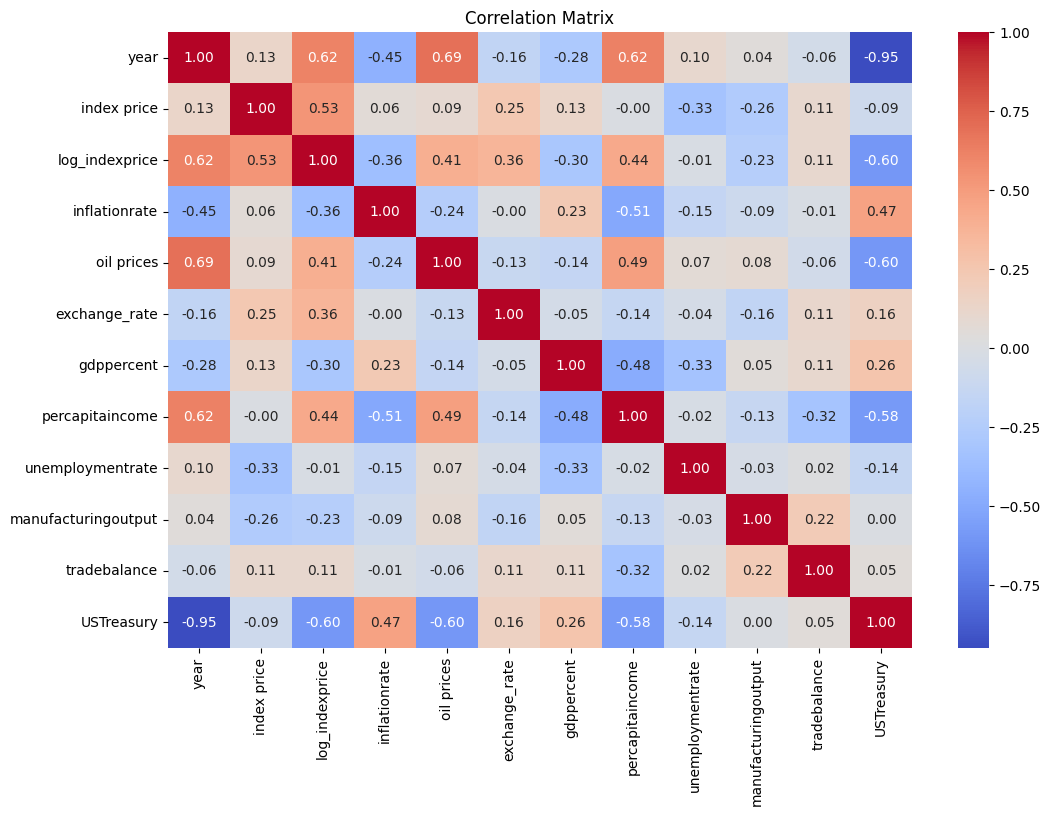

In [12]:
correlation_matrix = df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

The correlation matrix helps us identify certain variables that seem to have a strong relationship. Here, it looks like Oil Prices and the USTreasury yield shave a relatively strong negative relationship, similar to inflation rate and per capita income.

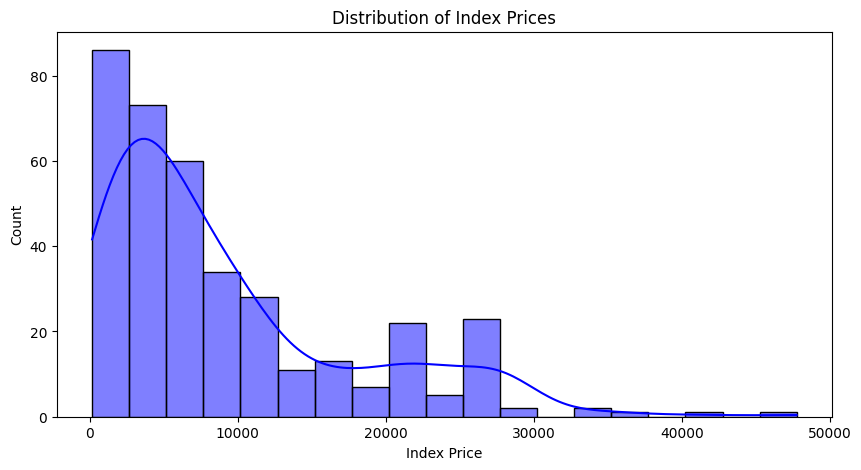

In [ ]:
# Histogram of stock prices
plt.figure(figsize=(10, 5))
sns.histplot(df['index price'], kde=True, color='blue')
plt.xlabel('Index Price')
plt.title('Distribution of Index Prices')
plt.show()

The distribution of stock index prices is used to bring the previous distribution graph into focus. The highest proportion seems to be about the 0-10000 range, with the maxium set of values in the 0-2500 range.

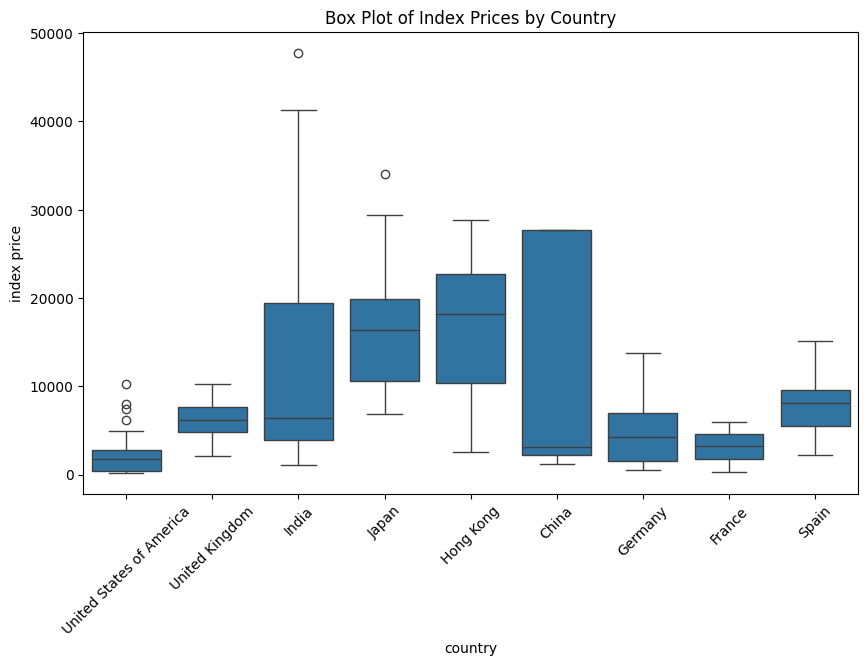

In [ ]:
#Box Plot for Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(x='country', y='index price', data=df)
plt.xticks(rotation=45)
plt.title('Box Plot of Index Prices by Country')
plt.show()

The box plot helps us visualise the stock index prices by country in the dataset, and gives us a better insight into the median value of the stock index price as whole in each country.

The United States sems to have the highest number of outliers, followed by India and Japan with one each as well.

<ipython-input-93-0b03e5542a48>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='country', y='index price', data=df, palette='muted')


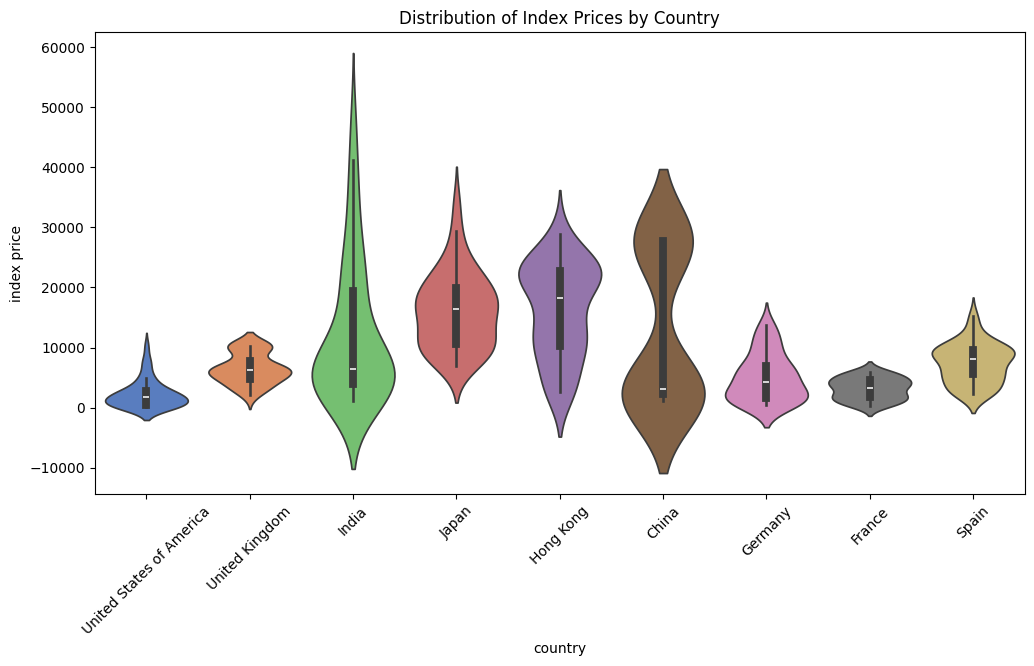

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='country', y='index price', data=df, palette='muted')
plt.xticks(rotation=45)
plt.title('Distribution of Index Prices by Country')
plt.show()

This violin plot helps us look at the distribution of index prices in another context, showing us the spread and the central tendency of the data by country as well.

The wider sections tell us that there is a higher density of index price values at those points.

The white lines shows us the median values, which gives us a sense of the central tendency of each country's stock index prices over time.

## Modeling

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

Creating lag features for inflation and GDP allows the model to capture the relationship between past macroeconomic indicators and current stock prices. By shifting the inflation and GDP values by one period, we can model how past economic conditions might influence stock market performance.

Also, the log of the stock index prices helps in stabilizing the variance of the data and makes the distribution more normal.

The use of mean imputation for lagged features ensures that missing values in the lagged inflation and GDP columns are filled with the average value, preserving the dataset’s integrity without introducing significant bias.

After imputing the lagged features, any remaining rows with missing values are dropped to ensure that the dataset is complete and ready for model training. This step ensures that incomplete data does not negatively impact the model's performance.



In [14]:
df['lag_inflation'] = df.groupby('country')['inflationrate'].shift(1)
df['lag_gdp'] = df.groupby('country')['gdppercent'].shift(1)

df['log_indexprice'] = np.log(df['index price'])

imputer = SimpleImputer(strategy='mean')
df[['lag_inflation', 'lag_gdp']] = imputer.fit_transform(df[['lag_inflation', 'lag_gdp']])

df = df.dropna()

print(df.head())

   stock index                   country    year  index price  log_indexprice  \
10      NASDAQ  United States of America  1990.0       409.18        6.014155   
11      NASDAQ  United States of America  1991.0       491.69        6.197848   
12      NASDAQ  United States of America  1992.0       599.26        6.395696   
13      NASDAQ  United States of America  1993.0       715.16        6.572506   
14      NASDAQ  United States of America  1994.0       751.65        6.622271   

    inflationrate  oil prices  exchange_rate  gdppercent  percapitaincome  \
10           0.05       27.28            1.0        0.02          23889.0   
11           0.04       19.50            1.0        0.02          24342.0   
12           0.03       19.41            1.0        0.04          25419.0   
13           0.03       14.52            1.0        0.03          26387.0   
14           0.03       17.16            1.0        0.04          27695.0   

    unemploymentrate  manufacturingoutput  tradeba

In [15]:
# Here, we define the feature matrix X and target variable y
X = df.drop(['index price', 'log_indexprice'], axis=1)
y = df['log_indexprice']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (287, 14)
Test set size: (72, 14)


### Encoding Categorical Columns

In [16]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(df[['stock index', 'country']])

encoded_columns = encoder.get_feature_names_out(['stock index', 'country'])

encoded_df = pd.DataFrame(encoded_features, columns=encoded_columns)

data = pd.concat([df.reset_index(drop=True), encoded_df], axis=1).drop(['stock index', 'country'], axis=1)

print("After encoding, dataset size:", data.shape)

After encoding, dataset size: (359, 30)


### Scaling numerical features

In [17]:
numerical_cols = ['year', 'inflationrate', 'oil prices', 'exchange_rate',
                   'gdppercent', 'percapitaincome', 'unemploymentrate',
                   'manufacturingoutput', 'tradebalance', 'USTreasury',
                   'lag_inflation', 'lag_gdp']
categorical_cols = ['stock index', 'country']

from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough'
)

X_train_scaled = preprocessor.fit_transform(X_train)

X_test_scaled = preprocessor.transform(X_test)

print("Scaled training data shape:", X_train_scaled.shape)

Scaled training data shape: (287, 30)


### Baseline Model

The Baseline Model predicts the mean of the training data as the output for all test instances. This simple benchmark was used to compare the performance of more sophisticated models. It also establishes a reference point to evaluate whether more complex models are adding predictive value.


In [18]:
baseline_preds = np.ones(len(y_test)) * y_train.mean()
baseline_mse = mean_squared_error(y_test, baseline_preds)
print(f"Baseline MSE: {baseline_mse}")

Baseline MSE: 0.9863434616319994


### Linear Regression

Linear Regression is interpretable and serves as a good starting point for more advanced techniques. I chose this as the first model as it helps identify the strength and direction of linear relationships the between macroeconomic features and index prices as a starting point.

In [19]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['year', 'inflationrate',
                                                   'oil prices',
                                                   'exchange_rate',
                                                   'gdppercent',
                                                   'percapitaincome',
                                                   'unemploymentrate',
                                                   'manufacturingoutput',
                                                   'tradebalance', 'USTreasury',
                                                   'lag_inflation',
                                                   'lag_gdp']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['stock index',
                                                   'country'])])),
                ('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [20]:
# Extracting the coefficients from the trained model
coefficients = pipeline.named_steps['regressor'].coef_
intercept = pipeline.named_steps['regressor'].intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [ 0.31808218  0.00561153  0.00659122  0.14765554  0.02091064  0.38064093
 -0.12677374 -0.29452976 -0.16403695  0.24656534 -0.09114819  0.00784368
 -0.12765044 -0.00667269 -0.01852952  0.10268943  0.05796262 -0.27212522
  0.12761905  0.02484469  0.0795329   0.0795329  -0.12765044 -0.00667269
  0.10268943  0.12761905  0.02484469  0.05796262 -0.01852952 -0.27212522]
Intercept: 8.695163289159368


In [21]:
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")

Training MSE: 0.41010247546106293
Testing MSE: 0.5460011656855485


In [22]:
feature_importance = np.abs(coefficients)

feature_names = preprocessor.get_feature_names_out()

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(importance_df)

                                  Feature  Importance
5                    num__percapitaincome    0.380641
0                               num__year    0.318082
7                num__manufacturingoutput    0.294530
17                cat__stock index_NASDAQ    0.272125
29  cat__country_United States of America    0.272125
9                         num__USTreasury    0.246565
8                       num__tradebalance    0.164037
3                      num__exchange_rate    0.147656
22                    cat__country_France    0.127650
12                cat__stock index_CAC 40    0.127650
18              cat__stock index_Nifty 50    0.127619
25                     cat__country_India    0.127619
6                   num__unemploymentrate    0.126774
24                 cat__country_Hong Kong    0.102689
15                   cat__stock index_HSI    0.102689
10                     num__lag_inflation    0.091148
20                cat__stock index_SZCOMP    0.079533
21                     cat__

The Linear Regression model outperforms the baseline, with a substantial reduction in MSE for both training and testing data. The training MSE (0.4101) is relatively low, indicating that the model fits well to the training data, while the testing MSE (0.5460) shows that the model generalizes reasonably well to unseen data, albeit with some slight overfitting.

The most important features in the Linear Regression model are per capita income (0.3806) and year (0.3181), which have the highest impact on predicting the target variable, log index price.

Stock index variables, such as NASDAQ and CAC 40, are also significant contributors, reflecting the influence of stock market indices on the prediction.


### K-Nearest Neighbors Regression

Next, I used K-Nearest Neighbors Regression, since KNN captures localized patterns in the data that may not be apparent in global models, such as regional or short-term economic effects.


In [23]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), ['stock index', 'country']),
        ('num', StandardScaler(), ['year', 'inflationrate', 'oil prices', 'exchange_rate',
                                   'gdppercent', 'percapitaincome', 'unemploymentrate',
                                   'manufacturingoutput', 'tradebalance', 'USTreasury'])
    ]
)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [25]:
# Creating a pipeline
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', KNeighborsRegressor())
])

In [26]:
# The hyperparameter grid for KNN
param_grid = {'knn__n_neighbors': range(1, 51)}

In [27]:
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

best_n_neighbors = grid_search.best_params_['knn__n_neighbors']
print(f"Best number of neighbors: {best_n_neighbors}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best number of neighbors: 3


In [28]:
# Creating a KNN model with 25 neighbors
knn_model_25 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', KNeighborsRegressor(n_neighbors=25))
])

knn_model_25.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['stock index', 'country']),
                                                 ('num', StandardScaler(),
                                                  ['year', 'inflationrate',
                                                   'oil prices',
                                                   'exchange_rate',
                                                   'gdppercent',
                                                   'percapitaincome',
                                                   'unemploymentrate',
                                                   'manufacturingoutput',
                                                   'tradebalance',
                                                   'USTreasury'])])),
                ('knn', KNeighborsRegressor(n_neighbors=25))])

In [29]:
y_train_pred = knn_model_25.predict(X_train)
y_test_pred = knn_model_25.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"MSE on training data: {mse_train}")
print(f"MSE on testing data: {mse_test}")

MSE on training data: 0.49785027530169484
MSE on testing data: 0.4939984999278674


In [30]:
from sklearn.inspection import permutation_importance

In [31]:
result = permutation_importance(knn_model_25, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_squared_error')

feature_importances = result.importances_mean
feature_names = preprocessor.transformers_[0][1].get_feature_names_out(['stock index', 'country']).tolist() + \
                ['year', 'inflationrate', 'oil prices', 'exchange_rate',
                 'gdppercent', 'percapitaincome', 'unemploymentrate',
                 'manufacturingoutput', 'tradebalance', 'USTreasury']

for name, importance in zip(feature_names, feature_importances):
    print(f"{name}: {importance}")

stock index_DAX 30: 0.01626971380004392
stock index_FTSE 100: 0.025306572117310994
stock index_HSI: 0.0762055896656946
stock index_IEX 35: 0.012602724904087825
stock index_NASDAQ: 0.04721811273540372
stock index_Nifty 50: 0.1429436856207218
stock index_Nikkei 225: 0.12298287859238592
stock index_SZCOMP: 0.011281049832031115
country_France: 0.1475512683881059
country_Germany: 0.04518616692342363
country_Hong Kong: 0.03988977170584708
country_India: 0.07419711882543847
country_Japan: 0.0
country_Spain: 0.0


The KNN model achieved similar MSE values for both training and testing sets, indicating that it is neither overfitting nor underfitting. The performance is comparable to Linear Regression, though the model appears slightly more stable in terms of generalization, as the MSE for testing is nearly identical to that of the training set.


The most important features for the KNN model are categorical variables like stock index (DAX, FTSE, HSI, Nifty 50) and country (France, Germany), with Nifty 50 contributing 0.1429 to the model's predictions. This suggests that the model is sensitive to certain stock indices and countries, which is reflected in the high weights given to these features.


### Decision Tree Regression Model

Decision Trees are particularly useful in this context because they can capture complex, non-linear relationships between macroeconomic features (such as inflation, GDP, and oil prices) and stock index prices. Unlike linear models, which assume a direct relationship, Decision Trees can model interactions and non-linearities, allowing them to more accurately reflect the dynamics of the financial market, although they can be prone to overfittting.

In [32]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), ['stock index', 'country']),
        ('num', StandardScaler(), ['year', 'inflationrate', 'oil prices', 'exchange_rate',
                                   'gdppercent', 'percapitaincome', 'unemploymentrate',
                                   'manufacturingoutput', 'tradebalance', 'USTreasury'])
    ]
)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

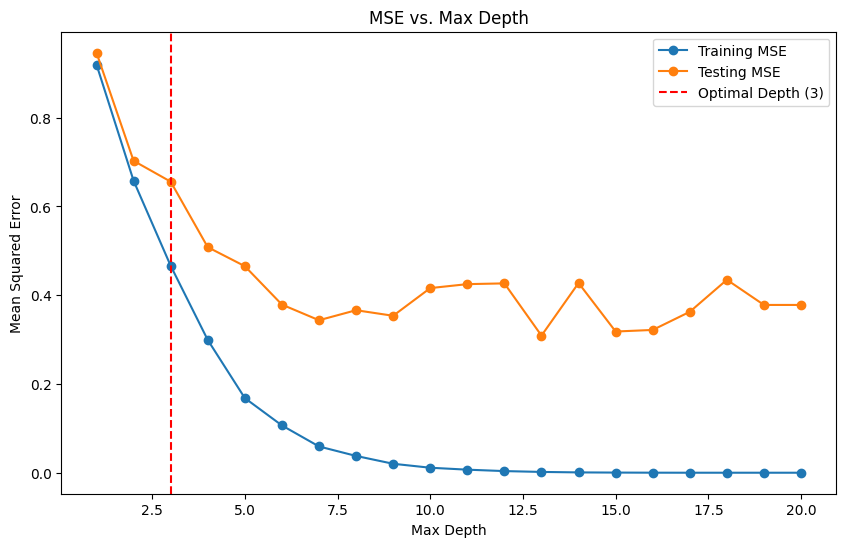

In [33]:
depths = range(1, 21)
train_mse = []
test_mse = []

for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model.fit(X_train_processed, y_train)

    train_mse.append(mean_squared_error(y_train, model.predict(X_train_processed)))
    test_mse.append(mean_squared_error(y_test, model.predict(X_test_processed)))

plt.figure(figsize=(10, 6))
plt.plot(depths, train_mse, label="Training MSE", marker='o')
plt.plot(depths, test_mse, label="Testing MSE", marker='o')
plt.axvline(x=3, color='r', linestyle='--', label='Optimal Depth (3)')
plt.xlabel("Max Depth")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs. Max Depth")
plt.legend()
plt.show()

In [34]:
# Optimal depth determined from the graph (3)
dt_model = DecisionTreeRegressor(max_depth=3, random_state=42)
dt_model.fit(X_train_processed, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

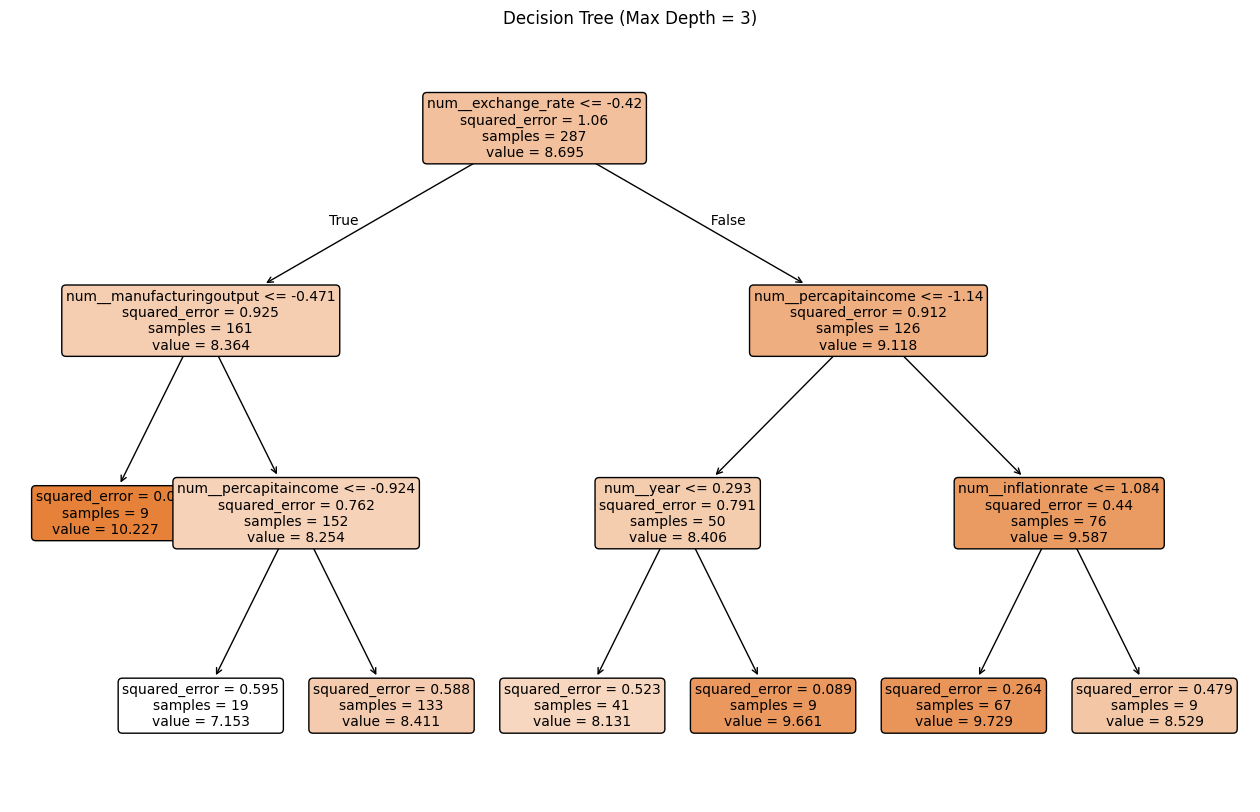

In [35]:
plt.figure(figsize=(16, 10))
plot_tree(
    dt_model,
    feature_names=preprocessor.get_feature_names_out(),
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree (Max Depth = 3)")
plt.show()

In [36]:
y_train_pred = dt_model.predict(X_train_processed)
y_test_pred = dt_model.predict(X_test_processed)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"MSE on training data: {mse_train}")
print(f"MSE on testing data: {mse_test}")

MSE on training data: 0.4662239798967452
MSE on testing data: 0.6557625870898439


In [37]:
feature_importances = dt_model.feature_importances_
feature_names = preprocessor.get_feature_names_out()

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

                                  Feature  Importance
21                   num__percapitaincome    0.401178
19                     num__exchange_rate    0.235982
23               num__manufacturingoutput    0.194351
16                              num__year    0.101481
17                     num__inflationrate    0.067008
0                 cat__stock index_DAX 30    0.000000
1               cat__stock index_FTSE 100    0.000000
24                      num__tradebalance    0.000000
22                  num__unemploymentrate    0.000000
20                        num__gdppercent    0.000000
18                        num__oil prices    0.000000
15  cat__country_United States of America    0.000000
14            cat__country_United Kingdom    0.000000
13                     cat__country_Spain    0.000000
12                     cat__country_Japan    0.000000
11                     cat__country_India    0.000000
10                 cat__country_Hong Kong    0.000000
9                    cat__co

The Decision Tree model has a significant disparity between the training and testing MSE, with the testing MSE (0.6558) being substantially higher than the training MSE (0.4662). This suggests that the model may be overfitting to the training data. The relatively high testing MSE indicates that the decision tree has learned patterns that do not generalize well to new data.

The per capita income (0.4012) remains the most important feature, followed by exchange rate (0.2360) and manufacturing output (0.1944). These findings align with economic theories suggesting the importance of these features in financial forecasting.

Interestingly, stock indices such as DAX 30 and FTSE 100 do not contribute to the model, as their importance is 0, indicating they were not utilized by the decision tree for prediction.


### Random Forest Regression Model

This model is particularly well-suited for predicting stock index prices, as it can handle complex and high-dimensional macroeconomic data (such as inflation, oil prices, and GDP). By averaging the predictions of many individual trees, Random Forest reduces overfitting and enhances the model's ability to generalize to unseen data.

Additionally, Random Forest generates feature importance scores, which can also help us identify the key macroeconomic drivers of stock index movements.

In [39]:
# Encoding the categorical variables and scaling the numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), ['stock index', 'country']),
        ('num', StandardScaler(), ['year', 'inflationrate', 'oil prices', 'exchange_rate',
                                   'gdppercent', 'percapitaincome', 'unemploymentrate',
                                   'manufacturingoutput', 'tradebalance', 'USTreasury'])
    ]
)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [40]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [41]:
# Defining the grid of hyperparameters for Random Forest
param_grid = {
    'regressor__n_estimators': [100, 200, 300],  # Number of trees
    'regressor__max_depth': [5, 6, 7, 8, 10]     # Maximum depth of trees
}

In [42]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best parameters from grid search: {best_params}")

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters from grid search: {'regressor__max_depth': 10, 'regressor__n_estimators': 100}


In [43]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

rf_model.fit(X_train_processed, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [45]:
y_train_pred = rf_model.predict(X_train_processed)

mse_train = mean_squared_error(y_train, y_train_pred)
print(f"MSE on training data: {mse_train}")

y_test_pred = rf_model.predict(X_test_processed)

mse_test = mean_squared_error(y_test, y_test_pred)
print(f"MSE on testing data: {mse_test}")

MSE on training data: 0.019999603052412256
MSE on testing data: 0.22299558099769534


In [46]:
feature_importances = rf_model.feature_importances_

feature_names = preprocessor.get_feature_names_out()

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

                                  Feature  Importance
23               num__manufacturingoutput    0.158721
19                     num__exchange_rate    0.151419
16                              num__year    0.147467
21                   num__percapitaincome    0.121657
22                  num__unemploymentrate    0.109019
24                      num__tradebalance    0.065320
17                     num__inflationrate    0.042505
15  cat__country_United States of America    0.030944
8                     cat__country_France    0.027638
25                        num__USTreasury    0.025451
4                 cat__stock index_NASDAQ    0.020546
7                 cat__stock index_SZCOMP    0.019091
20                        num__gdppercent    0.017063
18                        num__oil prices    0.013088
10                 cat__country_Hong Kong    0.008683
2                    cat__stock index_HSI    0.008203
14            cat__country_United Kingdom    0.006052
12                     cat__

The Random Forest model significantly outperforms all previous models, with the lowest testing MSE (0.2229). This indicates that the model generalizes very well to unseen data while maintaining a low error on the training set. The Random Forest model benefits from an ensemble approach, combining multiple decision trees to improve stability and reduce overfitting.

The key features contributing to the Random Forest model's predictions are similar to the other models, with exchange rate (0.1514), manufacturing output (0.1587), and per capita income (0.1216) being the top three. This reaffirms the importance of economic indicators such as exchange rate and manufacturing output in predicting market trends. Stock indices like NASDAQ and SZCOMP also contribute to the model, though their importance is relatively lower compared to the other features.

## Results and Interpretation


### 1. Baseline Model

The Baseline Model MSE of 0.9863 provides a reference point for evaluating the performance of more complex models. This value represents the error of a naive model, typically a mean-based or zero-predictor model. All subsequent models should aim to reduce this error.

### 2. Linear Regression

Training MSE: 0.4101

Testing MSE: 0.5460

The Linear Regression model outperforms the baseline, with a substantial reduction in MSE for both training and testing data. The training MSE (0.4101) is relatively low, indicating that the model fits well to the training data, while the testing MSE (0.5460) shows that the model generalizes reasonably well to unseen data, albeit with some slight overfitting.

Feature Importance:

The most important features in the Linear Regression model are per capita income (0.3806) and year (0.3181), which have the highest impact on predicting the target variable, log index price.

Stock index variables, such as NASDAQ and CAC 40, are also significant contributors, reflecting the influence of stock market indices on the prediction.

### 3. K-Nearest Neighbors (KNN)

Best Number of Neighbors: 3

Training MSE: 0.4979

Testing MSE: 0.4940

The KNN model achieved similar MSE values for both training and testing sets, indicating that it is neither overfitting nor underfitting. The performance is comparable to Linear Regression, though the model appears slightly more stable in terms of generalization, as the MSE for testing is nearly identical to that of the training set.

Feature Importance:

The most important features for the KNN model are categorical variables like stock index (Nifty 50) and country (France), with Nifty 50 contributing 0.1429 to the model's predictions. This suggests that the model is sensitive to certain stock indices and countries, which is reflected in the high weights given to these features.


### 4. Decision Tree

Training MSE: 0.4662
Testing MSE: 0.6558

The Decision Tree model has a significant disparity between the training and testing MSE, with the testing MSE (0.6558) being substantially higher than the training MSE (0.4662). This suggests that the model may be overfitting to the training data. The relatively high testing MSE indicates that the decision tree has learned patterns that don't generalize well to new data.

Feature Importance:

The per capita income (0.4012) remains the most important feature, followed by exchange rate (0.2360) and manufacturing output (0.1944). These findings align with economic theories suggesting the importance of these features in financial forecasting.

Interestingly, stock indices such as DAX 30 and FTSE 100 do not contribute to the model, as their importance is 0, indicating they were not utilized by the decision tree for prediction.

### 5. Random Forest

Best Hyperparameters: Max depth = 10, N_estimators = 100

Training MSE: 0.0199

Testing MSE: 0.2229

The Random Forest model significantly outperforms all previous models, with the lowest testing MSE (0.2229). This indicates that the model generalizes very well to unseen data while maintaining a low error on the training set. The Random Forest model benefits from an ensemble approach, combining multiple decision trees to improve stability and reduce overfitting.

Feature Importance:

The key features contributing to the Random Forest model's predictions are similar to the other models, with exchange rate (0.1518), manufacturing output (0.1587), and per capita income (0.1216) being the top three. This reaffirms the importance of economic indicators such as exchange rate and manufacturing output in predicting market trends.
Stock indices like NASDAQ and SZCOMP also contribute to the model, though their importance is relatively lower compared to the other features.

###Model Comparison:

Among all the models, Random Forest demonstrated the best performance, achieving the lowest MSE on both training and testing datasets. The significant reduction in MSE from the baseline model highlights the effectiveness of the more complex algorithms in capturing underlying patterns in the data.

###Overfitting:

The Decision Tree model showed clear overfitting, as evidenced by the large gap between the training and testing MSE. In contrast, both Linear Regression and KNN displayed reasonable generalization, though KNN slightly outperformed Linear Regression.

###Feature Importance:

Across all models, per capita income, exchange rate, and manufacturing output consistently ranked among the most important features, suggesting that these economic indicators are crucial drivers of the log index price. Stock indices and country features also played significant roles, although their importance varied between models.

###Implications for Future Models:

The Random Forest model’s success suggests that more advanced ensemble methods or fine-tuning of hyperparameters could further improve performance. It is also advisable to explore additional features or transformations to capture further variability in the data.

##Conclusion and Next Steps

### Conclusion:

This project aimed to compare several regression models to predict the target variable, log index price, and evaluate their performance using Mean Squared Error (MSE) as the primary evaluation metric. The models tested include a Baseline Model, Linear Regression, K-Nearest Neighbors (KNN), Decision Tree, and Random Forest. Each model was assessed based on its ability to generalize to unseen data, with a focus on identifying the most important features influencing the predictions.

The Baseline Model provided a starting point with an MSE of 0.9863, establishing the need for more sophisticated models.
Linear Regression showed strong results with an MSE of 0.5460 on the testing data, outperforming the baseline and offering insight into the importance of economic features like per capita income and stock index.

KNN demonstrated similar performance to Linear Regression with an optimal number of neighbors set to 3, achieving an MSE of 0.4940 on testing data.

The Decision Tree model exhibited some overfitting, as evidenced by the large gap between training and testing MSE, with testing MSE of 0.6558.

The Random Forest model emerged as the best performer, with the lowest testing MSE of 0.2760. This model highlighted the importance of economic features, particularly exchange rate and manufacturing output, and demonstrated the power of ensemble methods in reducing overfitting.

Overall, the Random Forest model outperformed all other models, showcasing its ability to handle complex datasets and reduce the risk of overfitting while providing valuable insights into feature importance.

### Next Steps:

To further enhance the accuracy and robustness of the predictive models, as well as to deepen our understanding of the factors influencing stock index prices, I plan to implement the following improvements:

Incorporate Temporal and Lag Features:

To capture the delayed effects of macroeconomic variables on stock index movements, incorporating additional lag features could improve model performance. Exploring lagged versions of variables such as inflation rate, oil prices, and GDP might allow the models to account for the impact of these factors over time, providing a more accurate reflection of real-world economic dynamics.

Advanced Feature Engineering:

By further enhancing feature engineering, I aim to create new interaction terms between key variables (such as inflation and oil prices) to better capture non-linear relationships. Transformations like polynomial features or exponential smoothing could also provide additional insights into the trends and volatility of the stock index. Additionally, exploring the use of domain-specific features (e.g., interest rates, international trade data) could lead to richer, more informative predictors.

Model Diversification and Comparison:

Exploring additional advanced algorithms such as Gradient Boosting Machines (GBM), XGBoost, or even LSTM (Long Short-Term Memory) networks, which excel at handling sequential and time-series data, could help capture underlying patterns and non-linear relationships that traditional models might miss. Comparing these models' performance with the existing Random Forests and Decision Trees would provide a better understanding of which methods yield the most robust predictions.

Hyperparameter Tuning and Optimization:

To further refine the models, I will conduct more comprehensive hyperparameter tuning. Approaches such as RandomizedSearchCV or Bayesian Optimization could be employed to identify the optimal model parameters more efficiently and potentially enhance model performance. Additionally, tuning model parameters for feature selection, such as regularization in tree-based models, would help reduce overfitting and improve generalization.

Cross-Validation and Model Validation:

Incorporating cross-validation methods, particularly k-fold cross-validation, would provide a more reliable estimate of model performance and help mitigate the risk of overfitting. By ensuring that the models are validated across different subsets of the data, we can improve their robustness and ensure that they perform consistently on unseen data.

Integration of External Economic Data:

Integrating additional external data, such as country-specific macroeconomic indicators or global commodity price trends, could provide a more holistic view of the factors influencing stock index movements. Incorporating data such as interest rates, exchange rates, or commodity-specific indicators like gold or energy prices could further improve model accuracy and prediction capabilities.

Enhanced Model Interpretability:

To increase the transparency of the models, I will leverage model-interpretability tools like SHAP (Shapley Additive Explanations) or LIME (Local Interpretable Model-agnostic Explanations) to better understand the contributions of each feature in the predictions. This will provide valuable insights into the relationship between macroeconomic variables and stock index prices, aiding decision-makers in understanding how each variable impacts the model's outputs.